In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
import joblib

In [3]:
df = pd.read_csv("final_scaled.csv")

In [4]:
df

,qty_dot_url,qty_slash_url,qty_tld_url,length_url,qty_dot_domain,qty_vowels_domain,domain_length,directory_length,file_length,time_response,...,ttl_hostname,domain_spf,url_shortened,domain_google_index,url_google_index,tls_ssl_certificate,domain_in_ip,server_client_domain,email_in_url,phishing
0,0.604684,-0.327011,-0.188299,-0.352067,0.307714,-0.569561,-0.219539,-0.638844,0.102892,-0.501410,...,-0.513851,-0.444442,-0.084738,-0.053507,-0.045028,-0.949793,-0.051429,-0.061423,-0.144171,1
1,2.110311,0.681103,7.359288,3.574228,0.307714,-0.182313,-0.364320,0.822929,0.238916,-0.288777,...,0.313968,-0.444442,-0.084738,-0.053507,-0.045028,1.052861,-0.051429,-0.061423,-0.144171,1
2,-0.148129,-0.327011,-0.188299,-0.550365,0.307714,-0.956808,-0.653882,-0.939797,-0.373195,0.028689,...,-0.542855,-0.444442,-0.084738,-0.053507,-0.045028,1.052861,-0.051429,-0.061423,-0.144171,0
3,1.357498,1.689216,-0.188299,0.758400,0.307714,0.592181,0.070023,1.682795,0.238916,-0.353927,...,-0.571285,-0.444442,-0.084738,-0.053507,-0.045028,1.052861,-0.051429,-0.061423,-0.144171,1
4,-0.148129,-0.831068,-0.188299,-0.471045,0.307714,-0.182313,0.070023,-0.208911,-0.169158,-0.353389,...,-0.254918,-0.444442,-0.084738,-0.053507,-0.045028,-0.949793,-0.051429,-0.061423,-0.144171,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115995,-0.148129,0.681103,-0.188299,-0.213258,-1.064846,-0.182313,-0.509101,-0.249121,0.029467,-0.457792,...,0.778419,-0.444442,-0.084738,-0.053507,-0.045028,-0.949793,-0.051429,-0.061423,-0.144171,1
115996,0.604684,-0.327011,-0.188299,1.908527,0.307714,-0.182313,0.214804,-0.939797,-0.373195,-0.452377,...,-0.594591,-0.444442,-0.084738,-0.053507,-0.045028,-0.949793,-0.051429,-0.061423,-0.144171,1
115997,-0.900942,-0.327011,-0.188299,-0.411556,-1.064846,-0.956808,-0.074758,-0.879874,-0.373195,-0.460412,...,-0.542151,-0.444442,-0.084738,-0.053507,-0.045028,1.052861,-0.051429,-0.061423,-0.144171,1
115998,-0.148129,0.681103,-0.188299,1.630910,0.307714,-1.344055,-0.943445,1.404780,0.029978,-0.494298,...,-0.561627,-0.444442,-0.084738,-0.053507,-0.045028,-0.949793,-0.051429,-0.061423,-0.144171,1


### Spliting Dataset

In [5]:
x = df.drop('phishing', axis=1)
y = df['phishing']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=33)

### Base Model

In [33]:
#Function to evaluate the models and output the accuracy score of the model
def evaluate(model, x_test, y_test):
    y_pred = model.predict(x_test)
    conf_mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_mat, annot=True, fmt="d")
    plt.title("confusion Matrix")
    plt.xlabel("Predict Label")
    plt.ylabel("True Label")
    plt.show()
    accuracy = accuracy_score(y_test, y_pred)
    print(f"accuracy = {accuracy}")
#   print(f"F1 score = {f1_score(y_test, y_pred)}")
    print(f"classification report is =\n {classification_report(y_test, y_pred)}")

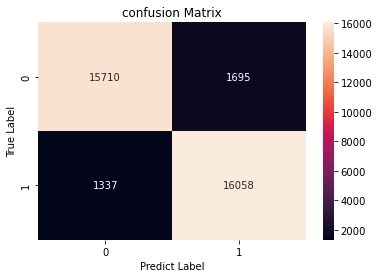

accuracy = 0.9128735632183909
classification report is =
               precision    recall  f1-score   support

           0       0.92      0.90      0.91     17405
           1       0.90      0.92      0.91     17395

    accuracy                           0.91     34800
   macro avg       0.91      0.91      0.91     34800
weighted avg       0.91      0.91      0.91     34800



In [34]:
lr_base = LogisticRegression()
lr_base.fit(x_train, y_train)
evaluate(lr_base, x_test, y_test)

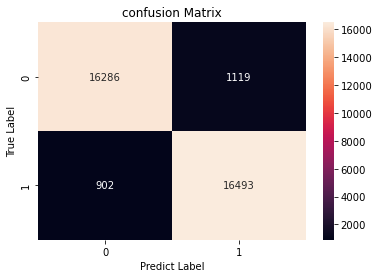

accuracy = 0.9419252873563219
classification report is =
               precision    recall  f1-score   support

           0       0.95      0.94      0.94     17405
           1       0.94      0.95      0.94     17395

    accuracy                           0.94     34800
   macro avg       0.94      0.94      0.94     34800
weighted avg       0.94      0.94      0.94     34800



In [38]:
# naive bayes
ab_base = AdaBoostClassifier()
ab_base.fit(x_train, y_train)
evaluate(ab_base, x_test, y_test)

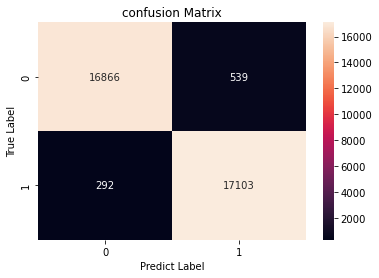

accuracy = 0.9761206896551724
classification report is =
               precision    recall  f1-score   support

           0       0.98      0.97      0.98     17405
           1       0.97      0.98      0.98     17395

    accuracy                           0.98     34800
   macro avg       0.98      0.98      0.98     34800
weighted avg       0.98      0.98      0.98     34800



In [39]:
# RandomForest Classifier
rf_base = RandomForestClassifier()
rf_base.fit(x_train, y_train)
evaluate(rf_base, x_test, y_test)

### Tuning hyperparameters of various models

In [49]:
ab_tune = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
params = {'base_estimator__max_depth':[4, 6, 8],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[25,50,75]}
              #'learning_rate':[0.01,0.1]}

grid_cv = GridSearchCV(ab_tune, params, verbose=3)
grid_cv.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END base_estimator__max_depth=4, base_estimator__min_samples_leaf=5, n_estimators=25;, score=0.963 total time=   5.2s
[CV 2/5] END base_estimator__max_depth=4, base_estimator__min_samples_leaf=5, n_estimators=25;, score=0.960 total time=   5.2s
[CV 3/5] END base_estimator__max_depth=4, base_estimator__min_samples_leaf=5, n_estimators=25;, score=0.959 total time=   5.2s
[CV 4/5] END base_estimator__max_depth=4, base_estimator__min_samples_leaf=5, n_estimators=25;, score=0.963 total time=   5.2s
[CV 5/5] END base_estimator__max_depth=4, base_estimator__min_samples_leaf=5, n_estimators=25;, score=0.959 total time=   5.2s
[CV 1/5] END base_estimator__max_depth=4, base_estimator__min_samples_leaf=5, n_estimators=50;, score=0.965 total time=  10.5s
[CV 2/5] END base_estimator__max_depth=4, base_estimator__min_samples_leaf=5, n_estimators=50;, score=0.965 total time=  10.6s
[CV 3/5] END base_estimator__max_depth=4, base_est

[CV 5/5] END base_estimator__max_depth=8, base_estimator__min_samples_leaf=5, n_estimators=25;, score=0.964 total time=   9.8s
[CV 1/5] END base_estimator__max_depth=8, base_estimator__min_samples_leaf=5, n_estimators=50;, score=0.963 total time=  19.7s
[CV 2/5] END base_estimator__max_depth=8, base_estimator__min_samples_leaf=5, n_estimators=50;, score=0.964 total time=  19.5s
[CV 3/5] END base_estimator__max_depth=8, base_estimator__min_samples_leaf=5, n_estimators=50;, score=0.964 total time=  19.6s
[CV 4/5] END base_estimator__max_depth=8, base_estimator__min_samples_leaf=5, n_estimators=50;, score=0.968 total time=  19.6s
[CV 5/5] END base_estimator__max_depth=8, base_estimator__min_samples_leaf=5, n_estimators=50;, score=0.964 total time=  19.6s
[CV 1/5] END base_estimator__max_depth=8, base_estimator__min_samples_leaf=5, n_estimators=75;, score=0.968 total time=  30.1s
[CV 2/5] END base_estimator__max_depth=8, base_estimator__min_samples_leaf=5, n_estimators=75;, score=0.967 tot

GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'base_estimator__max_depth': [4, 6, 8],
                         'base_estimator__min_samples_leaf': [5, 10],
                         'n_estimators': [25, 50, 75]},
             verbose=3)

In [50]:
grid_cv.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                         min_samples_leaf=10),
                   n_estimators=75)

In [52]:
rf_tune = RandomForestClassifier()
params_rf = {'max_depth': [5, 10, 18],
          'max_features': ['auto', 'sqrt'],
          'min_samples_leaf': [2, 4],
          'min_samples_split': [2, 5, 10],
          'n_estimators': [100, 200, 300]}
grid_cv_rf = GridSearchCV(rf_tune, params_rf, verbose=3)
grid_cv_rf.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.930 total time=   3.3s
[CV 2/5] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.928 total time=   3.2s
[CV 3/5] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.927 total time=   3.4s
[CV 4/5] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.932 total time=   3.4s
[CV 5/5] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.932 total time=   3.4s
[CV 1/5] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.931 total time=   7.0s
[CV 2/5] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.926 tota

[CV 1/5] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.930 total time=   3.4s
[CV 2/5] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.927 total time=   3.4s
[CV 3/5] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.927 total time=   3.3s
[CV 4/5] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.934 total time=   3.4s
[CV 5/5] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.931 total time=   3.4s
[CV 1/5] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.931 total time=   6.9s
[CV 2/5] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.929 total time=   6.9s
[CV 3/5] END max_depth=5, max_features=auto, min

[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.928 total time=   3.4s
[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.929 total time=   3.4s
[CV 4/5] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.934 total time=   3.5s
[CV 5/5] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.931 total time=   3.4s
[CV 1/5] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.933 total time=   6.8s
[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.929 total time=   6.7s
[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.926 total time=   6.8s
[CV 4/5] END max_depth=5, max_features=sq

[CV 3/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.955 total time=   5.6s
[CV 4/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.961 total time=   5.6s
[CV 5/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.957 total time=   5.7s
[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.959 total time=  11.4s
[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.957 total time=  11.4s
[CV 3/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.957 total time=  11.4s
[CV 4/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.962 total time=  11.5s
[CV 5/5] END max_depth=10, max_features=a

[CV 3/5] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.957 total time=   5.6s
[CV 4/5] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.959 total time=   5.8s
[CV 5/5] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.958 total time=   5.8s
[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.959 total time=  11.6s
[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.958 total time=  11.4s
[CV 3/5] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.957 total time=  11.6s
[CV 4/5] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.962 total time=  11.4s
[CV 5/5] END max_depth=10, max_features=a

[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.957 total time=   5.6s
[CV 4/5] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.961 total time=   5.7s
[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.958 total time=   5.7s
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.959 total time=  11.5s
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.958 total time=  11.5s
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.957 total time=  11.7s
[CV 4/5] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.961 total time=  11.5s
[CV 5/5] END max_depth=10, max_fea

[CV 3/5] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.969 total time=   7.7s
[CV 4/5] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.972 total time=   7.7s
[CV 5/5] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.969 total time=   7.7s
[CV 1/5] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.971 total time=  15.3s
[CV 2/5] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.968 total time=  15.2s
[CV 3/5] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.968 total time=  15.4s
[CV 4/5] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.972 total time=  15.5s
[CV 5/5] END max_depth=18, max_features=a

[CV 3/5] END max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.966 total time=   7.4s
[CV 4/5] END max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.971 total time=   7.5s
[CV 5/5] END max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.968 total time=   7.5s
[CV 1/5] END max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.970 total time=  14.8s
[CV 2/5] END max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.967 total time=  14.8s
[CV 3/5] END max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.966 total time=  14.9s
[CV 4/5] END max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.970 total time=  14.8s
[CV 5/5] END max_depth=18, max_features=a

[CV 3/5] END max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.967 total time=   7.8s
[CV 4/5] END max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.972 total time=   7.8s
[CV 5/5] END max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.969 total time=   8.0s
[CV 1/5] END max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.970 total time=  15.9s
[CV 2/5] END max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.968 total time=  16.5s
[CV 3/5] END max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.967 total time=  16.0s
[CV 4/5] END max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.972 total time=  16.2s
[CV 5/5] END max_depth=18, max_fea

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [53]:
grid_cv_rf.best_estimator_

RandomForestClassifier(max_depth=18, max_features='sqrt', min_samples_leaf=2,
                       n_estimators=200)

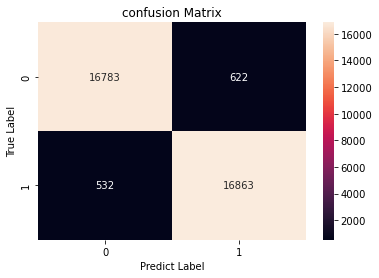

accuracy = 0.9668390804597701
classification report is =
               precision    recall  f1-score   support

           0       0.97      0.96      0.97     17405
           1       0.96      0.97      0.97     17395

    accuracy                           0.97     34800
   macro avg       0.97      0.97      0.97     34800
weighted avg       0.97      0.97      0.97     34800



In [54]:
ada_boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4, min_samples_leaf=10),n_estimators=75)
ada_boost.fit(x_train, y_train)
evaluate(ada_boost, x_test, y_test)

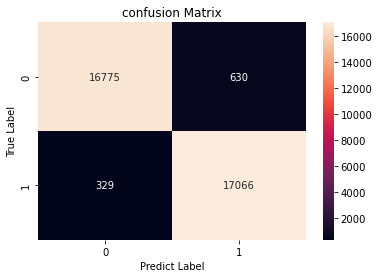

accuracy = 0.9724425287356322
classification report is =
               precision    recall  f1-score   support

           0       0.98      0.96      0.97     17405
           1       0.96      0.98      0.97     17395

    accuracy                           0.97     34800
   macro avg       0.97      0.97      0.97     34800
weighted avg       0.97      0.97      0.97     34800



In [56]:
random_forest = RandomForestClassifier(max_depth=18, max_features='sqrt', min_samples_leaf=2, n_estimators=200)
random_forest.fit(x_train, y_train)
evaluate(random_forest, x_test, y_test)

After random forest tuning model f1 score and accuracy is almost same. so there are less chance of overfitting

In [59]:
joblib.dump(random_forest, "random_forest_model.pkl")

['random_forest_model.pkl']